# Monte Carlo Simulation of betting strategy on a Fair Roulette

The purpose of this program is to simulate betting on a simplified Fair Roulette using the Kelly criterion. This roulette allows the gambler to bet on any number or "even-odd". Only the "even-odd" bet is simulated. The idea is to try to answer the question of how long would a better last playing the roulette if he only bet on odd using the Kelly criterion. The code is based on Lecture 6 of the lecture series MIT 6.0002 Introduction to Computational Thinking and Data Science.

In [ ]:
import random
# Create the class
class FairRoulette():
    
    # instances attributes
    def __init__(self):
        self.pockets = [i for i in range(1, 37)]
        self.ball = None
        self.pocketOdds = len(self.pockets)-1
        self.oeOdds = 2
        
    # define methods
    # method 1: ball spin
    def spin(self):
        self.ball = random.choice(self.pockets)
        if self.ball % 2 == 0:
            self.oe="even"
        else:
            self.oe="odd"
        #print(f"The ball landed in {self.ball} which is {self.oe}")
        
    # method 2: result of the bet
    def betPocket(self, amt, pocket=0, odd_even=''):
        if pocket==0:
            if str(odd_even)==str(self.oe):
                return amt*self.oeOdds
            else:
                return -amt
            
        elif pocket !=0:
            if str(odd_even)==str(self.oe): 
                if str(pocket) == str(self.ball) and odd_even !='':
                    return amt*self.pocketOdds*self.oeOdds
            
                elif str(pocket) == str(self.ball) and odd_even =='':
                    return amt*self.pocketOdds
            
                else:
                    return -amt
                
    # method to return a string? and describe the class?
    def __str__(self):
        return 'Fair Roulette'
    
# Function to calculate the Kelly Criterion
def kelly(p, b):
    f = p - ((1-p)/b)
    return f

# Funcion to calculate the probability taking odds as the inputv
def probs(odds):
    prob = odds/(1+odds)
    return prob

In [4]:
# Spin the roulette until I have no more money
spins = []
i=0
bankroll = 100
while bankroll>0:
    Roulette=FairRoulette()
    Roulette.spin()
    wager = bankroll*kelly(p=probs(Roulette.oeOdds-1), b=Roulette.oeOdds)
    bet = Roulette.betPocket(pocket=0, amt=wager, odd_even='odd')
    bankroll = bankroll + bet
    i += 1
else: 
    spins.append(i)
    print(f"Loop is finished. It had {i} number of spins")

Loop is finished. It had 12368 number of spins


In [7]:
# Now let's simulate the fair roulette 100 times
spins = []
for i in range(100):
    i=0
    bankroll = 100
    while bankroll>0:
        Roulette=FairRoulette()
        Roulette.spin()
        wager = bankroll*kelly(p=probs(Roulette.oeOdds-1), b=Roulette.oeOdds)
        bet = Roulette.betPocket(pocket=0, amt=wager, odd_even='odd')
        bankroll = bankroll + bet
        i += 1
    else: 
        spins.append(i)
        # print(f"Loop is finished. It had {i} number of spins")


Text(0.5, 1.0, 'Simulation of the Kelly Criterion used in a Fair Roulette')

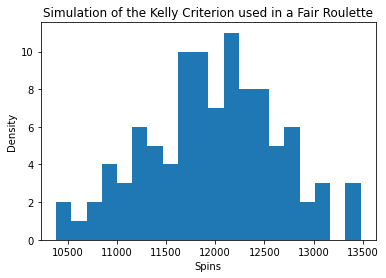

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
spins.sort()
plt.hist(x=spins, bins=20)
plt.xlabel('Spins')
plt.ylabel('Density')
plt.title('Simulation of the Kelly Criterion used in a Fair Roulette')